In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman= pd.read_csv('haberman.csv')

In [2]:
print(haberman.shape)

(306, 4)


~Total no of patients: 306

In [3]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [8]:
haberman['status'] = haberman['status'].map({1:"yes", 2:"no"})
#took this code from https://www.kaggle.com/kundnjha/detailed-eda-on-haberman-s-survival-dataset
#initially i tried using 1 instead of yes 

In [9]:
status_yes= haberman.loc[haberman['status']=='yes']
status_no= haberman.loc[haberman['status']=='no']

In [10]:
haberman['status'].value_counts()

yes    225
no      81
Name: status, dtype: int64

~Total deaths: 81

operations from 1958 to 1969


C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


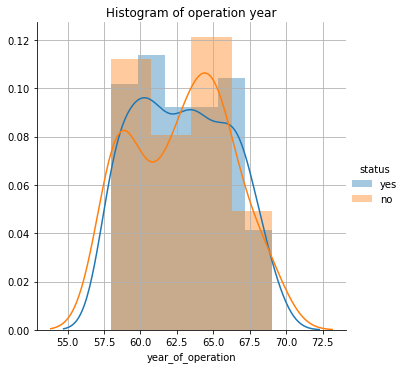

In [28]:
max_year=haberman['year'].max()
min_year=haberman['year'].min()
print('operations from 19{} to 19{}'.format(min_year, max_year))
sns.FacetGrid(haberman, hue='status', size=5)\
   .map(sns.distplot, 'year')\
   .add_legend()
plt.xlabel('year_of_operation')
plt.title('Histogram of operation year')
plt.grid()
plt.show()

~Patients from operation year 1964, 1965 had MAXIMUM DEATHS.<br>
~Patients from operation year 1960, 1961 had MAXIMUM SURVIVAL.

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


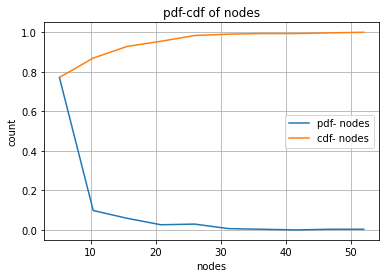

In [23]:
plt.figure(1)
counts, bin_edges= np.histogram(haberman['nodes'], bins=10, density= True)
pdf= counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='pdf- nodes')
plt.plot(bin_edges[1:], cdf, label='cdf- nodes')
plt.xlabel('nodes')
plt.ylabel('count')
plt.title('pdf-cdf of nodes')
plt.grid()
plt.legend()


In [46]:
print(np.percentile(haberman['nodes'], np.arange(0, 101, 10)))
print(np.percentile(status_yes['nodes'], np.arange(0, 101, 10)))
print(np.percentile(status_no['nodes'], np.arange(0, 101, 10)))
max_nodes=haberman['nodes'].max()
print('max nodes: {}'.format(max_nodes))

[ 0.  0.  0.  0.  0.  1.  2.  3.  7. 13. 52.]
[ 0.  0.  0.  0.  0.  0.  1.  2.  4.  8. 46.]
[ 0.  0.  0.  1.  3.  4.  6.  9. 13. 20. 52.]
max nodes: 52


~Appproximately 90% of patients had nodes <=13<br>
~50% of the patients who survived had nodes <=0<br>
~20% of patients who dies had nodes <=0<br>
~Maximum nodes detected in a patient: 52

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

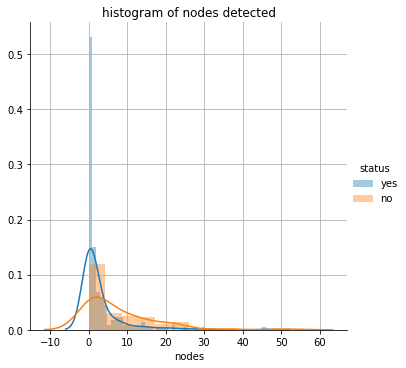

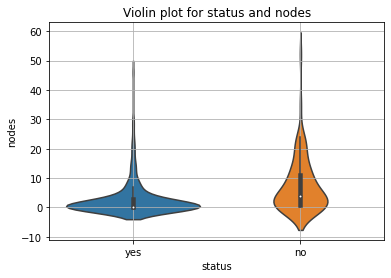

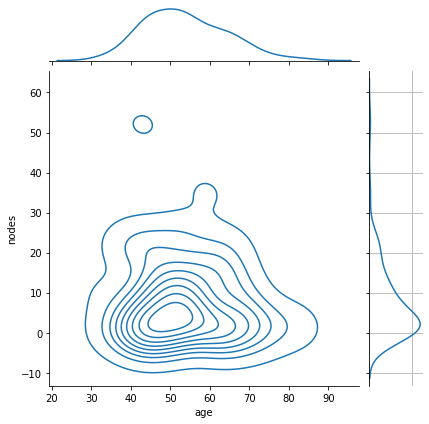

In [22]:
plt.figure(2)
sns.FacetGrid(haberman, hue='status', size=5)\
   .map(sns.distplot, 'nodes')\
   .add_legend()
plt.grid()
plt.title('histogram of nodes detected')
plt.show()

sns.violinplot(x='status', y='nodes', data=haberman, size=8)
plt.grid()
plt.title('Violin plot for status and nodes')
plt.show()

sns.jointplot(x='age', y='nodes', data=status_no, kind='kde')
plt.grid()
plt.xlabel('age')
plt.show()

~No patient survived with nodes greater than 9<br>
~Maximum nodes found in age group 50

In [32]:
print(np.percentile(haberman['age'], np.arange(0, 100, 25)))

[30.   44.   52.   60.75]


~75% of patients are below 60

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


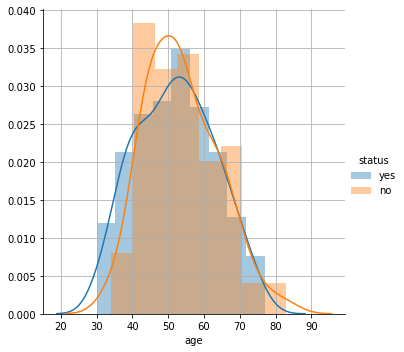

In [14]:
sns.FacetGrid(haberman, hue='status', size=5)\
   .map(sns.distplot, 'age')\
   .add_legend()
plt.grid()
plt.show()

~MAX DEATHS in age group 50<br>
~For age BELOW 40, SURVIVAL RATE IS MORE than death rate<br>
~AFTER 60 SURVIVAL and DEATH RATE are EQUAL<br>
~AFTER 78 DEATH RATE INCREASES

In [30]:
max_yes=status_yes['age'].max()
min_no=status_no['age'].min()
oldest=haberman['age'].max()
youngest=haberman['age'].min()
print('max age of survival: {}'.format(max_yes))
print('youngest death: {}'.format(min_no))
print('oldest patient: {}'.format(oldest))
print('youngest patient: {}'.format(youngest))

max age of survival: 77
youngest death: 34
oldest patient: 83
youngest patient: 30


# OBSERVATIONS

1. Total patients: 306<br>
Total deaths: 81<br>


2. Age of patients: (30-83)<br>
Youngest death: age 34<br>
Max age of survival: 77<br>
75% of patients below age 60<br>
More survival rate below age 40<br>
Age group 50 had maximum number of nodes


3. Operation year: (1958-1969)<br>
Higher death rate among patients operated in year 1964, 1965<br>
Higher survival rate among patients operated in year 1960, 1961


4. Nodes:
90% of patients had nodes <=13<br>
40% of patients had nodes <=0<br>
Maximum number of nodes detected in a patient were 52<br>
Only 20% deaths with nodes <=0<br>



